In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%cd "/home/volkan/Repos/multi-tier"
from data_analysis.helpers import *


In [ ]:
import json


def query_json_db(db_file, parameter_filters):
    """
    Queries a JSON database for entries matching specific parameters.

    Args:
        db_file (str): Path to the JSON database file.
        parameter_filters (dict): Dictionary containing parameter filters,
                                 where keys are parameter names and values are
                                 the desired values.

    Returns:
        tuple: A tuple containing:
            - dict: A dictionary of matching entries (keys are entry IDs, values are data).
            - list: A list of matching entry IDs.
    """

    with open(db_file, "r") as file:
        db_data = json.load(file)

    matching_entries_dict = {}
    matching_entries_params = []

    for entry_id, entry_data in db_data.items():
        if "parameters" in entry_data:
            parameters = entry_data["parameters"]
            if all(
                (
                    parameters.get(param) == value
                    if isinstance(value, (int, float))
                    else parameters.get(param) in value
                )
                for param, value in parameter_filters.items()
            ):
                matching_entries_dict[entry_id] = entry_data
                matching_entries_params.append(parameters)  # Store the matching ID

    return matching_entries_dict, matching_entries_params

# REQ RATE

In [ ]:
db_file = 'sim_outputs/mt_req_abilene_db.json'
fig, ax = plt.subplots()
x_axis = [10,12.5,15,17.5,20,22.5,25]

request_dist_param = 0.75
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,100]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-r^", label="mvip", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,50]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-ks", label="lfu", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-gx", label="lru", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-yo", label="unif", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-md", label="fifo", fillstyle="none")
ax.legend([ "MVIP", "LFU", "LRU", "UNIF", "FIFO"],fontsize=14)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Request rate (per sec, per node)",fontsize=15)
fig.savefig("../sim_outputs/mt_req_abilene_075_delay.pdf", bbox_inches='tight')

## REQ RATE - HITS

In [ ]:
topology="geant"
db_file = f'sim_outputs/mt_req_{topology}_db.json'

fig, ax = plt.subplots()
x_axis = [10,12.5,15,17.5,20,22.5,25]

request_dist_param = 0.75

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,150]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-r^", label="MVIP (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--r^", label="MVIP (second tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [[5,100]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-ks", label="LFU (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--ks", label="LFU (second tier)", fillstyle="none")

ax.legend(fontsize=14,ncol=2,loc="upper center",bbox_to_anchor=(0.5, 1.25))
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total cache hits",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
#request_rate_str = str(request_rate)
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hits.pdf", bbox_inches='tight')

# PENALTY

In [ ]:
topology = "geant"
db_file = f'sim_outputs/mt_pen_{topology}_db.json'
fig, ax = plt.subplots()

request_dist_param = 0.5

""" parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,50]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--rd", label="MVIP, $L_{n_2}=50$", fillstyle="none") """

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,100]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--rd", label="MVIP, $L_{n_2}=100$", fillstyle="none")

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,150]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "-r^", label="MVIP, $L_{n_2}=150$", fillstyle="none")

""" parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "palfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,50]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--ks", label="PALFU, $L_{n_2}=50$", fillstyle="none") """

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "palfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,100]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--ks", label="PALFU, $L_{n_2}=100$", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "palfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,150]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "-kx", label="PALFU, $L_{n_2}=150$", fillstyle="none")


ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Total penalty",fontsize=14)
ax.legend(fontsize=14)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0, 0), useMathText=True)
fig.savefig("sim_outputs/mt_pen_geant_05.pdf", bbox_inches='tight')

## CACHE SIZE - DELAY

In [ ]:
topology="abilene"
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'
fig, ax = plt.subplots()
x_axis = list(range(6))
#x_axis = list(range(9))
request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU", fillstyle="none")

""" db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'

parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF", fillstyle="none") """

db_file = f'sim_outputs/st_size_lfuvip_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "vip2",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--r^", label="VIP (1)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--bs", label="LFU", fillstyle="none")

""" db_file = f'sim_outputs/st_size_baselinesv2_{topology}_db.json'

parameter_filters["cache_pol"] = "lru"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--gx", label="LRU", fillstyle="none")

parameter_filters["cache_pol"] = "fifo"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--md", label="FIFO", fillstyle="none")

parameter_filters["cache_pol"] = "unif"
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--yo", label="UNIF", fillstyle="none")

import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["Multi-tier", "Single-tier"],ncols=2,fontsize=13,loc="upper center",bbox_to_anchor=(0.5,1.15))
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
leg2 = ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13, loc="right", bbox_to_anchor=(1.25,0.5))
ax.add_artist(leg2) """

ax.legend(["MVIP (multi-tier)", "LFU (multi-tier)", "VIP (single-tier)", "LFU (single-tier)"],fontsize=14,loc="center",bbox_to_anchor=(0.5, 0.52))
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_geant_all_075_15.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')
fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_inches='tight')

## CACHE SIZE - HITS / REPLACEMENTS

In [ ]:
topology="abilene"
metric="cache_hits"

fig, ax = plt.subplots()

if topology == "abilene":
    x_axis = list(range(6))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125]]
if topology == "geant":
    x_axis = list(range(9))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]

request_dist_param = 0.75
request_rate = 15

db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-r^", label="MVIP (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--r^", label="MVIP (second tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-bs", label="LFU (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--bs", label="LFU (second tier)", fillstyle="none")

db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-gx", label="LRU (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--gx", label="LRU (second tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-md", label="FIFO (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--md", label="FIFO (second tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], metric)
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-yo", label="UNIF (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--yo", label="UNIF (second tier)", fillstyle="none")

# ax.legend()
# handles, labels = ax.get_legend_handles_labels()
# order = [0,2,4,6,8,1,3,5,7,9]
# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=14,ncol=2,loc="upper center",bbox_to_anchor=(0.5, 1.5))
import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["First tier", "Second tier"],ncols=2,fontsize=14,loc="right",bbox_to_anchor=(1,0.3))
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
if metric == "cache_hits":
    ax.set_ylabel("Total cache hits",fontsize=15)
if metric == "cache_replacements":
    ax.set_ylabel("Total cache replacements",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hits.pdf", bbox_inches='tight')

## CACHE SIZE - HIT DELAYS

In [ ]:
topology="geant"
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'

fig, ax = plt.subplots()

if topology == "abilene":
    x_axis = list(range(6))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125]]
if topology == "geant":
    x_axis = list(range(9))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]

request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
cache_hits = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(cache_hits, 2)
cache_replacements = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(cache_replacements, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--r^", label="MVIP (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--r^", label="MVIP", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--ks", label="LFU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--bs", label="LFU", fillstyle="none")

db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--gx", label="LRU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--gx", label="LRU", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--md", label="FIFO (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--md", label="FIFO", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--yo", label="UNIF (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--yo", label="UNIF", fillstyle="none")

##############################TOTAL DELAY#########################################
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'
if topology == "abilene":
    x_axis = list(range(6))
    cache_capacities = [[5],[5,25],[5,50],[5,75],[5,100],[5,125]]
if topology == "geant":
    x_axis = list(range(9))
    cache_capacities = [[5],[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU (total delay)", fillstyle="none")

db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF (total delay)", fillstyle="none")

#ax.legend(fontsize=14,ncol=2,columnspacing=0.8,loc="upper center",bbox_to_anchor=(0.5, 1.35))

import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["First tier", "Second tier"],fontsize=14,loc="right",bbox_to_anchor=(0.65,0.89))
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)

ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Second tier read delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hit_delays.pdf", bbox_inches='tight')

In [ ]:
topology="abilene"
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'

fig, ax = plt.subplots()

if topology == "abilene":
    x_axis = list(range(6))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125]]
if topology == "geant":
    x_axis = list(range(9))
    cache_capacities = [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]

request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
cache_hits = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(cache_hits, 2)
cache_replacements = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(cache_replacements, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--r^", label="MVIP (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--r^", label="MVIP", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--ks", label="LFU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--bs", label="LFU", fillstyle="none")

db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--gx", label="LRU (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--gx", label="LRU", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--md", label="FIFO (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--md", label="FIFO", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hit_delays")
_, second_tier_read_delays = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
_, second_tier_hits = np.hsplit(read_delays, 2)
read_delays = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_replacements")
_, second_tier_replacements = np.hsplit(read_delays, 2)
second_tier_hit_delays = second_tier_read_delays * (second_tier_hits / (second_tier_replacements + second_tier_hits))
second_tier_hit_delays = np.append([0],second_tier_hit_delays)
#ax.plot(x_axis, second_tier_hit_delays, "--yo", label="UNIF (Tier 2 hit delay)", fillstyle="none")
second_tier_read_delays = np.append([0],second_tier_read_delays)
ax.plot(x_axis, second_tier_read_delays, "--yo", label="UNIF", fillstyle="none")

##############################TOTAL DELAY#########################################
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'

if topology == "abilene":
    x_axis = list(range(6))
    cache_capacities = [[5],[5,25],[5,50],[5,75],[5,100],[5,125]]
if topology == "geant":
    x_axis = list(range(9))
    cache_capacities = [[5],[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-r^", label="MVIP (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-bs", label="LFU (total delay)", fillstyle="none")

db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO (total delay)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": cache_capacities,
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF (total delay)", fillstyle="none")

#ax.legend(fontsize=14,ncol=2,columnspacing=0.8,loc="upper center",bbox_to_anchor=(0.5, 1.35))
import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linestyle="-", color="k"), mlines.Line2D([], [], linestyle="--", color="k")]
leg1 = ax.legend(handles, ["Total delay", "Second tier hit delay"],ncols=2,fontsize=13,loc="upper center",bbox_to_anchor=(0.5,1.15))
ax.add_artist(leg1)
handles = [
    mlines.Line2D([], [], linestyle="", color="r", marker="^", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="b", marker="s", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="g", marker="x", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="m", marker="d", ms=10, mew=2, fillstyle="none"),
    mlines.Line2D([], [], linestyle="", color="y", marker="o", ms=10, mew=2, fillstyle="none"),
]
leg2 = ax.legend(handles, ["MVIP", "LFU", "LRU", "FIFO", "UNIF"], fontsize=13, loc="right", bbox_to_anchor=(1.25,0.5))
ax.add_artist(leg2)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hit_delays.pdf", bbox_extra_artists=(leg1,leg2), bbox_inches='tight')

## CACHE SIZE - BASELINES

In [ ]:
topology="abilene"
db_file = f'sim_outputs/mt_size_baselinesv2_{topology}_db.json'
fig, ax = plt.subplots()
#x_axis = np.linspace(0, 100, 11, endpoint=True)
x_axis = list(range(6))
#x_axis = np.linspace(0, 50, 11, endpoint=True)
request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU (multi-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO (multi-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF (multi-tier)", fillstyle="none")

db_file = f'sim_outputs/nocache_{topology}_db.json'
parameter_filters = {
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
res = [res[0]] * len(x_axis)
ax.plot(x_axis, res, ":k", label="No caching", linewidth=2)

db_file = f'sim_outputs/st_size_baselinesv2_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--gx", label="LRU (single-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--md", label="FIFO (single-tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--yo", label="UNIF (single-tier)", fillstyle="none")


ax.legend(fontsize=13,ncols=2)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.set_size_inches(6.67,5)
fig.savefig(f"sim_outputs/size_comp_baselines_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_inches='tight')

## MORE TOPOLOGIES

In [60]:
def alltops(topology):
    db_file = f'sim_outputs/nocache_{topology}_db.json'

    request_dist_param = 0.75
    request_rate = 15
    parameter_filters = {
        "request_dist_param": request_dist_param,
        "request_rate": request_rate,
    }
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    nocache = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    assert len(nocache) == 1
    nocache = nocache[0]

    db_file = f'sim_outputs/mt_alltops_baselines_{topology}_db.json'
    parameter_filters = {
        "cache_pol": "lfu",
        "request_dist_param": request_dist_param,
        "request_rate": request_rate,
    }
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    lfu = 1 - res/nocache

    parameter_filters["cache_pol"] = "lru"
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    lru = 1 - res/nocache

    parameter_filters["cache_pol"] = "fifo"
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    fifo = 1 - res/nocache

    parameter_filters["cache_pol"] = "unif"
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    unif = 1 - res/nocache

    db_file = f'sim_outputs/mt_alltops_vip_{topology}_db.json'

    parameter_filters["cache_pol"] = "mvip"
    parameter_filters["vip_slot_len"] = 1
    result, param_sets = query_json_db(db_file, parameter_filters)
    param_list = dictsToParamSets(param_sets)
    res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
    mvip = 1 - res/nocache

    return max(fifo),max(unif),max(lru),max(lfu),max(mvip)

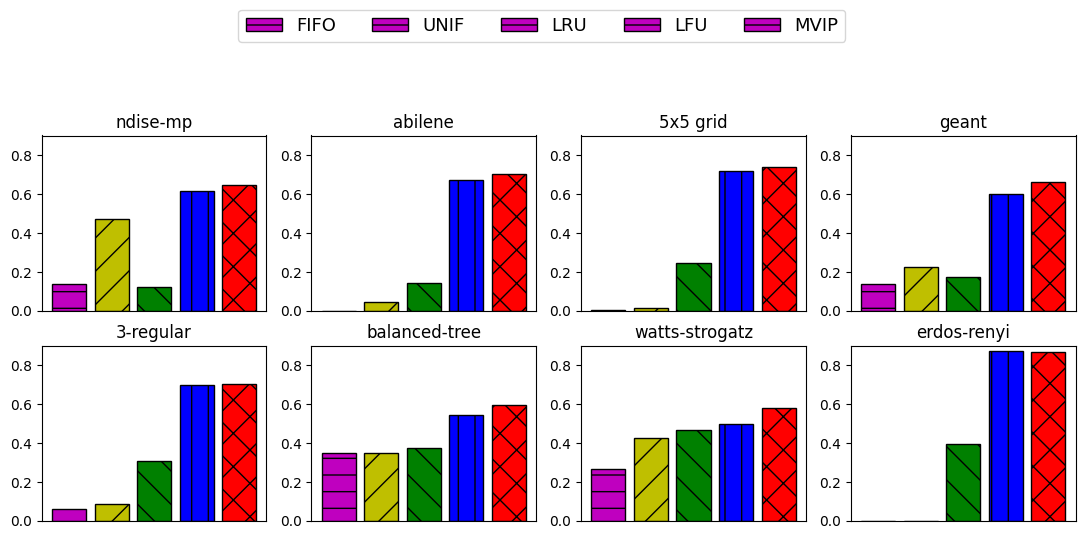

In [66]:
colors = ["m", "y", "g", "b", "r"]
hatches = ["-", "/", "\\", "|", "x"]
top_name_map = {"ndise-mp": "ndise-mp", "abilene": "abilene", "geant": "geant", "balanced": "balanced-tree", "watts": "watts-strogatz", "grid": "5x5 grid", "regular": "3-regular", "erdos": "erdos-renyi"}
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,6))
i = 0
for topology in ["ndise-mp", "abilene", "grid", "geant", "regular", "balanced", "watts", "erdos"]:
    r = i // 4
    c = i % 4
    ax[r,c].bar(range(5), alltops(topology), color=colors, hatch=hatches, edgecolor="black")
    ax[r,c].set_ylim([0,0.9])
    ax[r,c].get_xaxis().set_visible(False)
    ax[r,c].set_title(top_name_map[topology])
    i += 1
fig.set_size_inches(13.34,5)
fig.legend(["FIFO", "UNIF", "LRU", "LFU", "MVIP"], fontsize=13, loc="upper center", ncol=5, bbox_to_anchor=(0.5,1.15))
#fig.savefig(f"sim_outputs/alltops_baselines.pdf", bbox_inches='tight')